In [11]:
import time
import random
import numpy as np
from numpy import *
import pandas as pd
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib as mpl

In [12]:
def loadDataSet(fileName):      
    numFeat = len(open(fileName).readline().split('\t')) - 1 
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

def regularize(xMat):
    inMat = xMat.copy()
    inMeans = mean(inMat,0)   
    inVar = var(inMat,0)      
    inMat = (inMat - inMeans)/inVar
    return inMat
def rssError(yArr,yHatArr): 
    return ((yArr-yHatArr)**2).sum()
#误差大小评价函数
def ComputerError(x,y,w):
    x=np.array(x)
    y=np.array(y)
    #x = np.hstack((np.ones((x.shape[0],1)),x))
    m=x.shape[0] 
    result=np.array(np.dot(x,w)-y)
    err=(np.multiply(result,result).sum())/(2*m)
    return err

In [13]:
def SwLinearRegression(x,y,step=0.01,iters_num=100): #step为步长,iters_num为迭代次数
    xMat = mat(x)
    yMat= mat(y).T
    
    yMean = mean(yMat,0)
    yMat = yMat - yMean     
    xMat = regularize(xMat)
    m=xMat.shape[0]
    n=xMat.shape[1]

    ws = ones((n,1)) #初始权重设为1

    Mat = zeros((iters_num, n))
    for i in range(iters_num):
        if i%1000 ==0 : #每迭代1000次，打印归回系数
            print ("第%d次迭代后回归系数为："%i,end ="")
            print(ws.T)
            err=ComputerError(xMat,yMat,ws)
            print("误差为：",err)
        lowestError = inf #初始误差设为正无穷大
        for j in range(n):
            for sign in [-1,1]: # 贪心算法
                wsTest = ws.copy() #初始化测试集
                wsTest[j] += step*sign 
                yTest = xMat*wsTest #预测值ytest
                rssE = rssError(yMat.A,yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        Mat[i,:]=ws.T
    return Mat

def plot_SwLinearRegression(n,numIt,Wmat):
    origin_feature =list(train)
    plt.figure(figsize=(10,7))
    for i in range(n):
        plt.plot(arange(numIt), Wmat[:,i], label = origin_feature[i])
    plt.legend(loc="upper right")
    plt.title('StageweightLR Line chart',fontsize=18)
    plt.xlabel('iters_num')
    plt.ylabel('w')
    plt.grid(ls="--",lw =1)
    plt.show()


开始读取训练数据...
读取数据一共用时0.06283044815063477秒
第0次迭代后回归系数为：[[1. 1. 1. 1. 1. 1. 1. 1.]]
误差为： 1772.0447707729456
第1000次迭代后回归系数为：[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 -8.81239526e-16
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]]
误差为： 726.6798644903744
第2000次迭代后回归系数为：[[ 1.  1.  1. -1.  1.  1.  1.  1.]]
误差为： 253.0428463326987
第3000次迭代后回归系数为：[[ 1.     1.     0.456 -1.042  1.     1.     0.586  1.   ]]
误差为： 133.7211730326939
第4000次迭代后回归系数为：[[ 1.     1.     0.147 -0.834  1.     1.     0.103  1.   ]]
误差为： 80.10204348500159
第5000次迭代后回归系数为：[[ 1.     1.    -0.241 -0.567  1.     1.    -0.242  1.   ]]
误差为： 42.534996615908355
第6000次迭代后回归系数为：[[ 1.     1.    -0.628 -0.3    1.     1.    -0.588  1.   ]]
误差为： 19.363067869367764
第7000次迭代后回归系数为：[[ 1.     0.905 -0.723 -0.097  1.     0.725 -0.665  0.745]]
误差为： 9.01079715980068
第8000次迭代后回归系数为：[[ 1.     0.905 -0.723  0.011  1.     0.009 -0.578  0.656]]
误差为： 5.463604931029112
第9000次迭代后回归系数为：[[ 0.654  0.905 -0.704  0.018  1.    -0.309 -

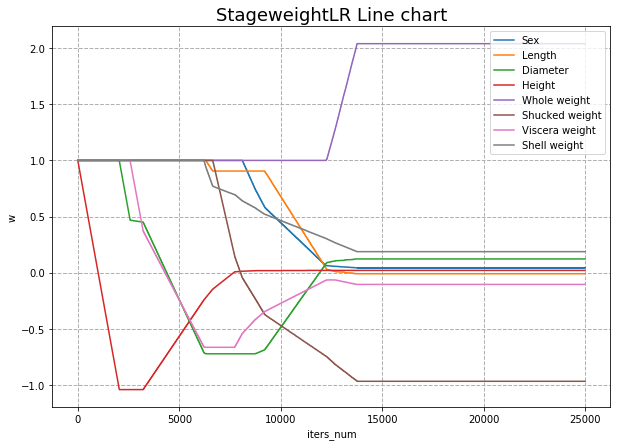

In [14]:
def main():
    print("开始读取训练数据...")
    t0 = time.time()
    xArr,yArr = loadDataSet("abalone.txt")
    train = pd.read_csv('abalone.csv',low_memory=False)
    origin_feature =list(train)
    print('读取数据一共用时{}秒'.format(time.time() - t0))
    numIt = 25000
    Wmat = SwLinearRegression(xArr,yArr,step=0.001,iters_num=numIt)
    n = Wmat.shape[1]#特征数，即回归系数个数
    plot_SwLinearRegression(n,numIt,Wmat)

if __name__ =='__main__':
    main()